# Trabajo Práctico 2

In [1]:
# imports de libs que usamos para leer y procesar datos en masa
import os
import csv
import zipfile
import io
import sys
import shutil
import random
import seaborn as sns

import numpy as np
import pandas as pd
from PIL import Image

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para tareas generales de machine learning: separar conjuntos de datos, evaluar exactitud, etc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# libs que usamos para construir y entrenar redes neuronales
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten, Activation
from keras.layers.normalization import BatchNormalization

# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## PreProcesado  de Datos

In [57]:
test_path = '../datasets/shipsnet/test/'
test_csv = '../datasets/shipsnet/test.csv'

train_path = '../datasets/shipsnet/train/'
train_csv = '../datasets/shipsnet/train.csv'

paths = [train_path, test_path]
#train = pd.read_csv(zf.open('train.csv'))
#train.shape

### Codigo usado para crear los archivos CSV usados para Test y Train

In [58]:
width, height = 80,80
columns = []

#Agregamos los nombres de las columnas a ambos csv.

count=0
for x in range(width):
    for y in range(height):
        columns.append("P" + str(count))
        count += 1
        
#agregamos columnas de target y nombre
columns.append("target_class")
columns.append("name")

with open(train_csv, 'w+') as f:
    thewriter = csv.writer(f) 
    thewriter.writerow(columns)

with open(test_csv, 'w+') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(columns)

### Codigo usado para separar el dataset de imagenes en Test y Train

In [47]:
#directorio de las 4000 imagenes
dirname = os.listdir('../datasets/shipsnet/shipsnet')

In [48]:
#mezclamos las imagenes
random.shuffle(dirname)

In [49]:
#separamos en train y test
for x in range(len(dirname)):
    if x < 3200:
        shutil.copy('../datasets/shipsnet/shipsnet/'+dirname[x], '../datasets/shipsnet/train')
    else:
        shutil.copy('../datasets/shipsnet/shipsnet/'+dirname[x], '../datasets/shipsnet/test')

In [51]:
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

In [55]:
myFileList = createFileList(train_path)

../datasets/shipsnet/train/


In [7]:
varx = 0
for file in myFileList:
    
    target = file.split('/')
    name = target[4]
    target_class =  int(target[4].split('__')[0])
    
    img_file = Image.open(file)
    
    width, height = img_file.size

    # Convertimos la imagen a escala de grises
    img_grey = img_file.convert('L')
    
    pix = img_grey.load()
    datos_imagen = []

    for w in range(img_grey.size[0]):
        for h in range(img_grey.size[1]):
            datos_imagen.append(pix[w,h])
    
    #agregamos valores de target y nombre
    datos_imagen.append(target_class)
    datos_imagen.append(name)

    with open("../datasets/shipsnet/train.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(datos_imagen)

0__20180712_180755_0f2d__-118.1509285019418_33.736157292984934.png 0
0__20170430_181117_0e26__-122.28903227894936_37.76160433354677.png 0
0__20180131_175841_1010__-118.14724396474439_33.726965541492056.png 0
0__20170522_180634_0f42__-122.25268709059267_37.826300269163255.png 0
0__20160905_193458_0c37__-122.45251494281177_37.62754866962661.png 0
0__20170713_180939_1002__-122.33730234381262_37.768293979955395.png 0
0__20170716_180816_103a__-122.21168771515327_37.72598836793689.png 0
0__20171118_181532_1030__-122.34711997185568_37.72865492201759.png 0
0__20170718_180713_102f__-122.04559339459337_37.66773507746603.png 0
0__20170501_180619_1005__-122.50833343279122_37.721298593068234.png 0
0__20171210_181626_100a__-122.22503150918189_37.827230139626145.png 0
1__20180705_213444_0f02__-122.33112497702128_37.7166678658198.png 1
0__20170619_180825_1032__-122.2512336067811_37.74403806984657.png 0
0__20170803_234846_0c54__-122.4223675500529_37.823658460340184.png 0
0__20170719_180903_101d__-122.4

0__20171217_181637_1032__-122.33516654077653_37.729101863269385.png 0
0__20171207_181640_101b__-122.36140701213421_37.80920226097382.png 0
1__20171025_175648_0e26__-118.15349753221352_33.69822802602944.png 1
0__20170731_181110_100c__-122.1100734442055_37.74570660140298.png 0
1__20180708_180454_0f28__-118.22845098169047_33.722288357084146.png 1
0__20180712_180429_101b__-118.26398795200797_33.72133450335209.png 0
0__20180711_180503_1027__-118.21812809977303_33.73873218896573.png 0
0__20170718_180713_102f__-122.24516900605092_37.771200845749696.png 0
1__20170703_180945_1009__-122.3450395800887_37.7290760136203.png 1
0__20170830_181003_0f4e__-122.33567067354387_37.76030819123333.png 0
1__20180712_180755_0f2d__-118.22612778818288_33.72285255793923.png 1
0__20171127_181539_101e__-122.36377962246702_37.723256986220896.png 0
0__20180712_180429_101b__-118.10931387760863_33.68064034612527.png 0
0__20170730_181043_103d__-122.34541210935261_37.76022750552693.png 0
0__20170505_181258_0e2f__-122.334

0__20171127_185539_0f29__-122.35159215627587_37.785759738706574.png 0
0__20161212_180856_0e30__-122.33760196306517_37.75761512696048.png 0
0__20170909_181729_0e0f__-122.10553293151526_37.76930430226699.png 0
0__20171021_181323_1003__-122.14974968530616_37.7302627198732.png 0
1__20170730_191231_0f21__-122.34222573382337_37.75082710047983.png 1
0__20170717_180818_1010__-122.32590421714731_37.7406221446609.png 0
1__20170724_181036_1011__-122.34540497671433_37.757172017590726.png 1
0__20170716_180833_101b__-122.40700928865517_37.81322613595979.png 0
0__20170703_180945_1009__-122.43982886368555_37.75484654657575.png 0
1__20170504_180549_1025__-122.34170656308858_37.751770580625916.png 1
0__20170502_180546_1044__-122.21972260566585_37.72266190880681.png 0
0__20171023_184815_0f21__-118.19511125994666_33.71130622344423.png 0
1__20180711_182157_1048__-122.35200586297024_37.781300536515815.png 1
0__20170910_181216_1010__-122.32929933321851_37.73793756929841.png 0
0__20170619_180826_1032__-122.34

1__20161116_180803_0e14__-122.32544610911427_37.7273161143406.png 1
1__20180712_180755_0f2d__-118.14319157389623_33.7363644522928.png 1
0__20180706_180314_1024__-118.21530366573968_33.70147735618563.png 0
0__20170917_190616_0f3c__-122.41281471377471_37.81179510079203.png 0
0__20170508_171051_0c43__-122.40787547166238_37.64899213181819.png 0
1__20180708_180908_0f47__-118.15328750044623_33.735783554733885.png 1
0__20170730_181514_0e20__-122.23815565801209_37.7010698205214.png 0
0__20150718_184300_090b__-122.42663861582857_37.80913223576201.png 0
0__20170921_181407_1031__-122.33825043391892_37.738339674565744.png 0
1__20171207_181551_103c__-122.33535415235686_37.7271560778983.png 1
0__20180710_182341_1011__-122.15729205447367_37.75565255911729.png 0
0__20171118_181532_1030__-122.34012505731766_37.71893582675969.png 0
0__20170730_181514_0e20__-122.28516743555205_37.67827239169895.png 0
1__20180712_211332_0f06__-118.20615276144385_33.706815861818534.png 1
0__20161227_180931_0e30__-122.56847

0__20170721_180823_100b__-122.33025541519739_37.83955635072546.png 0
1__20170622_180819_1034__-122.33613878363441_37.75747169713343.png 1
0__20170430_181117_0e26__-122.20416004478265_37.7232068181798.png 0
0__20170501_181319_0e1f__-122.43977955796186_37.82906928237985.png 0
0__20171129_181545_1022__-122.34004742946429_37.71233774111778.png 0
1__20170719_180901_101d__-122.34551737673225_37.75987657850744.png 1
0__20170403_180411_100f__-122.28532433955333_37.778832932685816.png 0
0__20170129_181027_0e1f__-122.29808404678268_37.762442734298254.png 0
1__20180711_180503_1027__-118.2094105381439_33.70597233464287.png 1
1__20171118_181532_1030__-122.33517282566321_37.72839887204015.png 1
0__20170609_180751_101b__-122.32111572380163_37.7168810486974.png 0
0__20160704_204348_0d05__-122.33323169412_37.75883429252433.png 0
0__20170707_181425_0e14__-122.05516823794919_37.73614006839395.png 0
1__20171023_184815_0f21__-118.221018877267_33.732480856222665.png 1
0__20170620_180742_102f__-122.324371762

0__20170611_180736_1008__-122.11689456507031_37.61277835257146.png 0
1__20170917_190615_0f3c__-122.33447197539547_37.72682662682025.png 1
0__20170830_181004_0f4e__-122.34644547725367_37.739548094396234.png 0
1__20161218_180845_0e26__-122.32642033508343_37.728754777401534.png 1
0__20170707_181135_100b__-122.33461976095035_37.786368132591655.png 0
0__20170129_181027_0e1f__-122.34451253618298_37.72707216089186.png 0
0__20170501_181320_0e1f__-122.3360474729729_37.760066960583195.png 0
0__20170430_181118_0e26__-122.04240901973303_37.63493758893554.png 0
0__20170622_180819_1034__-122.33884846521858_37.73617987416077.png 0
0__20170430_181117_0e26__-122.15210322199844_37.72389841995879.png 0
0__20170101_180916_0e30__-122.47922633032526_37.82359910990126.png 0
0__20180708_180453_0f28__-118.15243406114678_33.734925737760754.png 0
0__20180705_182235_0f4d__-122.33939672906811_37.739616958453816.png 0
0__20170703_180944_1009__-122.32882122041141_37.83227469668378.png 0
0__20170707_174131_0c0b__-122

In [ ]:
myFileList = createFileList(test_path)

In [2]:
data_train = pd.read_csv('../datasets/shipsnet/train.csv')

In [3]:
data_train.shape

(3200, 6402)

In [4]:
data_train.sample(5)

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P6392,P6393,P6394,P6395,P6396,P6397,P6398,P6399,target_class,name
231,106,71,75,77,70,70,75,89,98,71,...,135,129,89,77,75,70,67,69,0,0__20161218_180845_0e26__-122.40070366127401_3...
2783,77,77,79,79,77,76,80,83,84,81,...,78,79,78,75,77,82,80,78,1,1__20170721_180825_100b__-122.32613080820607_3...
2025,94,85,83,76,80,83,86,90,81,77,...,104,90,93,102,99,98,93,80,0,0__20171218_181723_1007__-122.56310851426478_3...
1023,125,122,116,116,111,108,116,134,130,119,...,147,133,126,130,139,158,166,170,0,0__20170701_181015_1042__-122.50112623643929_3...
1038,78,77,75,74,72,79,78,74,76,74,...,78,73,75,82,83,76,73,75,0,0__20170702_181120_103a__-122.3253085755005_37...


In [5]:
data_test = pd.read_csv('../datasets/shipsnet/test.csv')

In [6]:
data_test.shape

(800, 6402)

In [7]:
data_test.head(5)

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P6392,P6393,P6394,P6395,P6396,P6397,P6398,P6399,target_class,name
0,113,119,113,114,116,116,110,104,109,111,...,111,113,115,116,115,120,125,120,0,0__20180712_180755_0f2d__-118.1509285019418_33...
1,59,57,61,59,55,53,47,51,56,56,...,67,64,69,67,65,72,75,73,0,0__20170430_181117_0e26__-122.28903227894936_3...
2,141,154,175,175,173,174,174,171,162,154,...,70,74,75,73,73,75,74,72,0,0__20180131_175841_1010__-118.14724396474439_3...
3,175,176,192,215,238,244,245,244,245,246,...,121,131,151,173,187,165,118,81,0,0__20170522_180634_0f42__-122.25268709059267_3...
4,128,107,97,94,98,98,110,116,95,62,...,133,118,109,104,121,143,160,160,0,0__20160905_193458_0c37__-122.45251494281177_3...


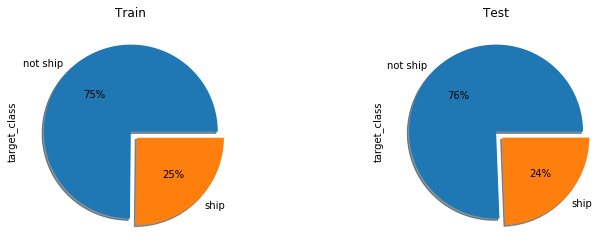

In [8]:
f,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].set_title('Train')
data_train["target_class"].value_counts().plot.pie(labels = ["not ship","ship"],
                                              autopct = "%1.0f%%",
                                              shadow = True,explode=[0,.1],
                                              ax=ax[0],)
ax[1].set_title('Test')
data_test["target_class"].value_counts().plot.pie(labels = ["not ship","ship"],
                                              autopct = "%1.0f%%",
                                              shadow = True,explode=[0,.1],
                                              ax=ax[1],)

In [9]:
PICTURE_SIZE = 80
CHANNELS = 'N'

INPUT_COLUMNS = []
INPUT_COLUMNS = [x for x in data_train.columns if x not in ["target_class","name"]]

In [10]:
def show_images(samples, title='file'):
    for index, sample in samples.iterrows():
        if  title is not None:
            if isinstance(title, str):
                title = [title, ]
            title_text = ', '.join(str(sample[title_field]) for title_field in title)
            plt.title(title_text)
            
        sample_as_grid = sample[INPUT_COLUMNS].values.reshape(PICTURE_SIZE, PICTURE_SIZE).astype(np.float)/255
        print(sample_as_grid)
        #sample_as_grid = np.transpose(sample_as_grid, (1,2,0)) / 100
        plt.axis('off')
        plt.imshow(sample_as_grid, cmap='gray')
        plt.show()

[[0.44705882 0.45098039 0.45098039 ... 0.45882353 0.46666667 0.45098039]
 [0.44705882 0.45098039 0.44705882 ... 0.44313725 0.44705882 0.43921569]
 [0.43921569 0.44313725 0.44705882 ... 0.43529412 0.44705882 0.43921569]
 ...
 [0.4745098  0.4627451  0.4627451  ... 0.47058824 0.4745098  0.4627451 ]
 [0.46666667 0.44705882 0.45098039 ... 0.4627451  0.47058824 0.4627451 ]
 [0.46666667 0.46666667 0.45490196 ... 0.46666667 0.46666667 0.47058824]]


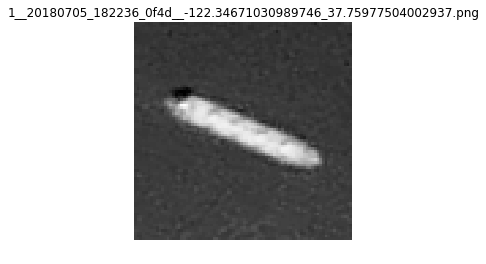

[[0.50196078 0.50588235 0.50196078 ... 0.51372549 0.50196078 0.50588235]
 [0.49803922 0.51372549 0.49803922 ... 0.50980392 0.50196078 0.50588235]
 [0.51764706 0.5254902  0.49803922 ... 0.52941176 0.51372549 0.50588235]
 ...
 [0.50588235 0.50588235 0.50588235 ... 0.50980392 0.49803922 0.51764706]
 [0.51372549 0.51372549 0.50588235 ... 0.51372549 0.50588235 0.50588235]
 [0.48627451 0.50196078 0.50196078 ... 0.50588235 0.50588235 0.50196078]]


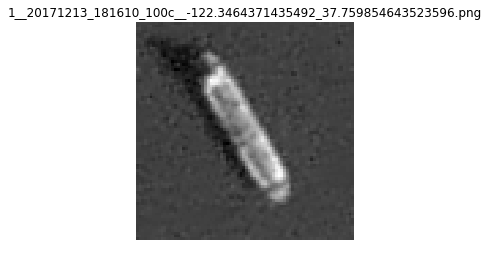

[[0.27058824 0.22745098 0.19607843 ... 0.40784314 0.39215686 0.40392157]
 [0.29019608 0.24313725 0.27058824 ... 0.41568627 0.35686275 0.37254902]
 [0.29411765 0.20392157 0.21568627 ... 0.40784314 0.39607843 0.4       ]
 ...
 [0.27058824 0.32156863 0.39215686 ... 0.16470588 0.20392157 0.21960784]
 [0.2745098  0.31764706 0.41960784 ... 0.19607843 0.20392157 0.21568627]
 [0.28235294 0.34509804 0.41176471 ... 0.12941176 0.14509804 0.16078431]]


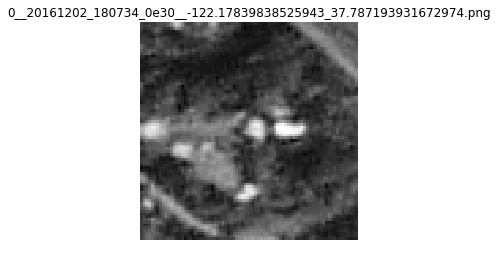

[[0.25098039 0.25098039 0.2745098  ... 0.23529412 0.21960784 0.27058824]
 [0.22745098 0.22745098 0.23137255 ... 0.31372549 0.22745098 0.20392157]
 [0.24313725 0.23921569 0.25882353 ... 0.38039216 0.25098039 0.21960784]
 ...
 [0.35686275 0.4        0.45098039 ... 0.45098039 0.37254902 0.32156863]
 [0.32941176 0.38039216 0.43137255 ... 0.46666667 0.43529412 0.38823529]
 [0.32941176 0.39607843 0.45490196 ... 0.41960784 0.4627451  0.41960784]]


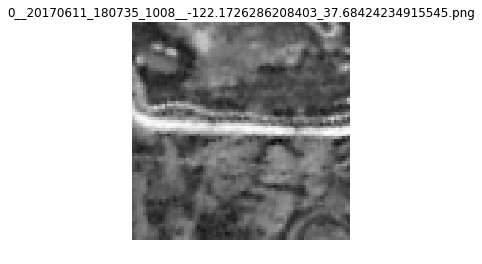

[[0.45882353 0.49019608 0.48627451 ... 0.50980392 0.50196078 0.50196078]
 [0.50980392 0.49803922 0.49803922 ... 0.50196078 0.47843137 0.50196078]
 [0.56470588 0.54117647 0.51764706 ... 0.50196078 0.49411765 0.50588235]
 ...
 [0.52156863 0.50980392 0.52156863 ... 0.43921569 0.44705882 0.44705882]
 [0.5254902  0.52156863 0.50588235 ... 0.43137255 0.43529412 0.43137255]
 [0.51372549 0.52156863 0.50588235 ... 0.41960784 0.42352941 0.44313725]]


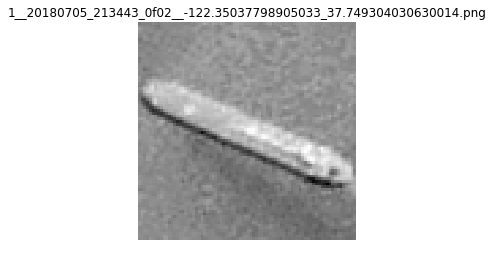

In [11]:
show_images(data_train.sample(5), 'name')

In [12]:
# Funciones para redes neuronales tradicionales 

def extract_inputs(dataset):
    return dataset[INPUT_COLUMNS].values / 255

def extract_inputs_convolutional(dataset):
    #sample[INPUT_COLUMNS].values.reshape(PICTURE_SIZE, PICTURE_SIZE).astype(np.float)/255
    return dataset[INPUT_COLUMNS].values.reshape(len(dataset), PICTURE_SIZE, PICTURE_SIZE).astype(np.float) / 255

def extract_outputs(dataset):
    return dataset.target_class.values

In [30]:
# Funcion para evaluar la performance de la red neuronal

def add_predictions(dataset):
    predictions = model_traditional.predict(extract_inputs(dataset))
    
    inputs = extract_inputs_function(set_data)
    outputs = extract_outputs_function(set_data)
    predictions = model.predict(inputs)

    print(set_name, '#' * 80)

    # print metrics

    print('Accuracy:', accuracy_score(outputs, predictions))
    print('Precision:', precision_score(outputs, predictions))
    print('Recall:', recall_score(outputs, predictions))
    print('F1-score:', f1_score(outputs, predictions))
    print()
    print ("\nclassification report :\n",(classification_report(outputs,predictions)))
    print()
    
def add_predictions_convolutional(dataset): 
    predictions = model_convolutional.predict(extract_inputs_convolutional(dataset))
    
    for fruit_number, fruit in enumerate(FRUTAS):
        dataset[fruit] = predictions[:, fruit_number]
    dataset['prediction'] = dataset[FRUTAS].idxmax(axis=1)
    dataset['prediction_confidence'] = dataset[FRUTAS].max(axis=1)
    dataset['correct'] = dataset.prediction == dataset.nombres_frutas

In [13]:
model_traditional = Sequential([
    Dense(1000, activation='relu', input_shape=(len(INPUT_COLUMNS), )),
    
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(300, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid'),
])

model_traditional.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',],
)

model_traditional.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              6401000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)      

In [14]:
history_traditional = model_traditional.fit(
    extract_inputs(data_train),
    extract_outputs(data_train),
    epochs=45,
    batch_size=128,
    validation_data=(
        extract_inputs(data_test),
        extract_outputs(data_test),
    )
)

Instructions for updating:
Use tf.cast instead.
Train on 3200 samples, validate on 800 samples
Epoch 1/45
3200/3200 [==============================] - 6s 2ms/step - loss: 0.8299 - acc: 0.6891 - val_loss: 0.4700 - val_acc: 0.7775
Epoch 2/45
3200/3200 [==============================] - 3s 1ms/step - loss: 0.4532 - acc: 0.8119 - val_loss: 0.3645 - val_acc: 0.8387
Epoch 3/45
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4087 - acc: 0.8206 - val_loss: 0.3725 - val_acc: 0.8538
Epoch 4/45
3200/3200 [==============================] - 4s 1ms/step - loss: 0.3679 - acc: 0.8391 - val_loss: 0.3372 - val_acc: 0.8562
Epoch 5/45
3200/3200 [==============================] - 4s 1ms/step - loss: 0.3475 - acc: 0.8466 - val_loss: 0.2947 - val_acc: 0.8725
Epoch 6/45
3200/3200 [==============================] - 4s 1ms/step - loss: 0.3198 - acc: 0.8631 - val_loss: 0.2907 - val_acc: 0.8938
Epoch 7/45
3200/3200 [==============================] - 4s 1ms/step - loss: 0.3124 - acc: 0.8731 - va

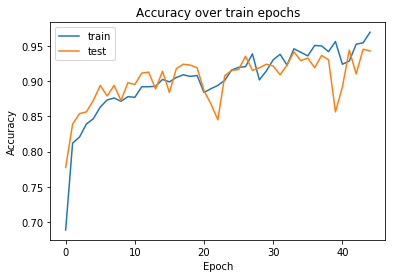

In [15]:
plt.plot(history_traditional.history['acc'], label='train')
plt.plot(history_traditional.history['val_acc'], label='test')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

train ################################################################################
inputs
[[0.24705882 0.24705882 0.23137255 ... 0.4745098  0.47058824 0.44313725]
 [0.3372549  0.37647059 0.44313725 ... 0.37647059 0.35686275 0.34901961]
 [0.63529412 0.60392157 0.56862745 ... 0.58823529 0.59607843 0.59215686]
 ...
 [0.41960784 0.41568627 0.41960784 ... 0.43921569 0.43921569 0.42745098]
 [0.42352941 0.43137255 0.43529412 ... 0.43137255 0.42745098 0.43137255]
 [0.50588235 0.50588235 0.50588235 ... 0.4745098  0.47843137 0.47843137]]
outputs
[0 0 0 ... 1 1 1]
predictions
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
Accuracy: 0.95875
Precision: 0.9433465085638999
Recall: 0.8894409937888199




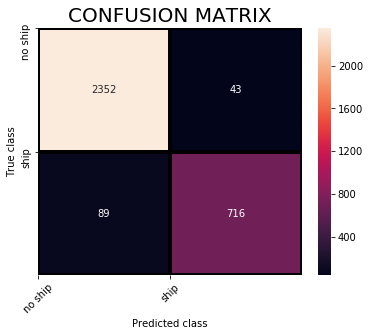

test ################################################################################
inputs
[[0.44313725 0.46666667 0.44313725 ... 0.47058824 0.49019608 0.47058824]
 [0.23137255 0.22352941 0.23921569 ... 0.28235294 0.29411765 0.28627451]
 [0.55294118 0.60392157 0.68627451 ... 0.29411765 0.29019608 0.28235294]
 ...
 [0.39215686 0.4        0.39607843 ... 0.40784314 0.40392157 0.4       ]
 [0.34901961 0.31372549 0.3372549  ... 0.50196078 0.56862745 0.57254902]
 [0.35294118 0.37254902 0.35686275 ... 0.35294118 0.34509804 0.33333333]]
outputs
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 

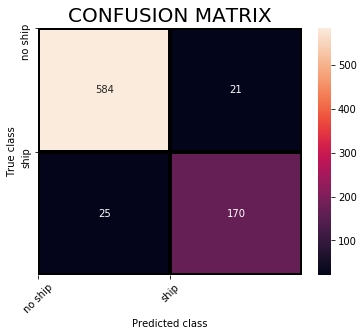

In [36]:
sets = [('train', data_train), ('test', data_test)]
for set_name, set_data in sets:
    
    inputs = extract_inputs(set_data)
    outputs = extract_outputs(set_data)
    predictions = model_traditional.predict(extract_inputs(set_data)).round()

    print(set_name, '#' * 80)
    print('inputs')
    print(inputs)
    print('outputs')
    print(outputs)
    print('predictions')
    print(predictions)

    print('Accuracy:', accuracy_score(outputs, predictions))
    print('Precision:', precision_score(outputs, predictions))
    print('Recall:', recall_score(outputs, predictions))
    #print('F1-score:', f1_score(outputs, predictions))
    print()
    #print ("\nclassification report :\n",(classification_report(outputs,predictions)))
    print()
    
    
    '''print(' ' * 30,'#' * 25, set_name, '#' * 25)
    print('accuracy', accuracy_score(set_data.nombres_frutas, set_data.prediction))
    print('precision_score', precision_score(set_data.nombres_frutas, set_data.prediction, average="macro"))
    print('recall', recall_score(set_data.nombres_frutas, set_data.prediction, average="macro"))'''
    
    # plot confussion matrix
    
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(outputs,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    plt.xticks([0, 1], ['no ship', 'ship'], rotation=45)
    plt.yticks([0, 1], ['no ship', 'ship'])
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    plt.show()